In [26]:
#coding: UTF-8

#ベクトル化手法
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#どんなクラスタリングになったか、棒グラフ出力
import matplotlib.pyplot as plt

#x-means、k-means++使用
import pyclustering
from pyclustering.cluster import xmeans

filepass = r'C:\Users\4440\Desktop\TG117264\AI特許分析モデル\7.tms_to_python\tms_to_python_内視鏡.txt'
f = open(filepass,'r')

#空白で単語を区切り、改行で文書を区切っているテキストデータ
#１文書ずつ、単語に分割してリストに入れていく[([単語1,単語2,単語3],文書id),...]こんなイメージ
#words：文書に含まれる単語のリスト（単語の重複あり）
# tags：文書の識別子（リストで指定．1つの文書に複数のタグを付与できる）
trainings = [TaggedDocument(words = data.split(),tags = [i]) for i,data in enumerate(f)]

In [27]:
# トレーニング
m = Doc2Vec(documents=trainings, dm=1,vector_size=300, window=8, min_count=30, workers=4)
# モデルのセーブ
m.save("doc2vec_test.model")

[1, 5, 6, 10, 11, 20, 24, 28, 31, 32, 33, 35, 36, 37, 39, 40, 45, 47, 48, 50, 52, 53, 55, 58, 60, 61, 62, 63, 67, 68, 69, 74, 76, 78, 79, 81, 86, 90, 92, 94, 95, 97, 99, 101, 103, 104, 109, 110, 114, 116, 121, 123, 125, 126, 127, 128, 130, 131, 132, 133, 136, 138, 139, 141, 147, 149, 150, 152, 154, 157, 160, 161, 162, 164, 165, 166, 167, 168, 171, 173, 177, 184, 187, 190, 191, 192, 194, 196, 198, 199, 200, 205, 206, 208, 212, 214, 216, 217, 221, 222, 224, 225, 226, 234, 235, 237, 238, 239, 245, 246, 247, 248, 252, 253, 254, 255, 257, 258, 262, 266, 268, 269, 271, 275, 276, 277, 278, 279, 282, 291, 292, 293, 294, 295, 297, 299, 300, 301, 302, 304, 305, 309, 311, 312, 314, 316, 320, 323, 328, 329, 330, 332, 336, 338, 339, 340, 342, 343, 345, 349, 354, 356, 358, 361, 362, 363, 364, 368, 372, 374, 377, 378, 379, 380, 381, 383, 386, 389, 394, 395, 396, 398, 399, 400, 402, 403, 404, 406, 407, 409, 412, 413, 414, 417, 421, 424, 427, 428, 429, 431, 432, 435, 436, 437, 438, 440, 441, 443, 445, 

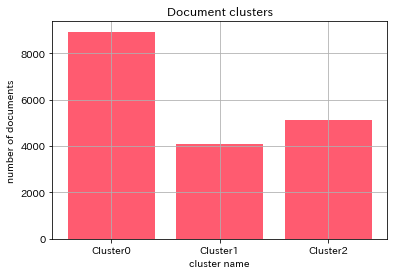

In [56]:
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn.cluster import KMeans
import sys
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt


#モデルを読み込む
#モデルは絶対パスで指定してください
m = Doc2Vec.load('doc2vec_test.model')

#ベクトルをリストに格納
vectors_list=[m.docvecs[n] for n in range(len(m.docvecs))]

#ドキュメント番号のリスト
doc_nums=range(1,len(m.docvecs))

#クラスタリング設定
#クラスター数を変えたい場合はn_clustersを変えてください
n_clusters = 3
kmeans_model = KMeans(n_clusters=n_clusters, verbose=1, random_state=1, n_jobs=-1)

#クラスタリング実行
kmeans_model.fit(vectors_list)

#クラスタリングデータにラベル付け
labels=kmeans_model.labels_

#ラベルとドキュメント番号の辞書づくり
cluster_to_docs = defaultdict(list)
for cluster_id, doc_num in zip(labels, doc_nums):
    cluster_to_docs[cluster_id].append(doc_num)

#クラスター出力
for docs in cluster_to_docs.values():
    print(docs)

#x軸ラベル
x_label_name = []
for i in range(n_clusters):
    x_label_name.append("Cluster"+str(i))

#x=left ,y=heightデータ. ここではx=クラスター名、y=クラスター内の文書数
left = range(n_clusters)
height = []
for docs in cluster_to_docs.values():
    print(len(docs))
    height.append(len(docs))
print(height,left,x_label_name)

#棒グラフ設定
plt.bar(left,height,color="#FF5B70",tick_label=x_label_name,align="center")
plt.title("Document clusters")
plt.xlabel("cluster name")
plt.ylabel("number of documents")
plt.grid(True)
plt.show()

In [106]:
#BICを使用したx-meansを使用

#k++を使用して初期値を決定、今回は適当にクラスター数を2
initializer = xmeans.kmeans_plusplus_initializer(data=vectors_list, amount_centers=2)
initial_centers = initializer.initialize()
xm = xmeans.xmeans(data=vectors_list, initial_centers=initial_centers)
xm.process()

In [126]:
#実行
clusters = xm.get_clusters()
cluster_2 =[]
for cluster in clusters:
    cluster_2.append(cluster)

In [128]:
print(len(cluster_2))

20


In [129]:
#ラベルとドキュメント番号の辞書づくり
cluster_to_docs = defaultdict(list)

for cluster_id, clusters in zip(labels, clusters):
    cluster_to_docs[cluster_id].append(clusters)

In [130]:
#x軸ラベル
x_label_name = []
for i in range(n_clusters):
    x_label_name.append("Cluster"+str(i))

#x=left ,y=heightデータ. ここではx=クラスター名、y=クラスター内の文書数
left = range(n_clusters)
height = []
i = 0

for cluster in cluster_2:
        print(len(cluster))
        height.append(len(cluster))

print("height：",height)
print("left：",left)
print("クラスターラベル名：",x_label_name)

2318
886
1041
1190
751
1204
313
796
572
699
484
315
296
2105
1441
1019
339
1767
640
4
height： [2318, 886, 1041, 1190, 751, 1204, 313, 796, 572, 699, 484, 315, 296, 2105, 1441, 1019, 339, 1767, 640, 4]
left： range(0, 20)
クラスターラベル名： ['Cluster0', 'Cluster1', 'Cluster2', 'Cluster3', 'Cluster4', 'Cluster5', 'Cluster6', 'Cluster7', 'Cluster8', 'Cluster9', 'Cluster10', 'Cluster11', 'Cluster12', 'Cluster13', 'Cluster14', 'Cluster15', 'Cluster16', 'Cluster17', 'Cluster18', 'Cluster19']


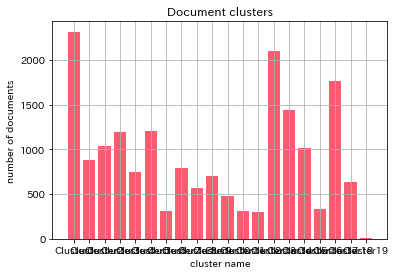

In [131]:
#棒グラフ設定
plt.bar(left,height,color="#FF5B70",tick_label=x_label_name,align="center")
plt.title("Document clusters")
plt.xlabel("cluster name")
plt.ylabel("number of documents")
plt.grid(True)
plt.show()